In [1]:
import os

try:
    snakemake
except NameError:
    from snakemk_util import load_rule_args
    
    os.chdir('../..')
    
    snakemake = load_rule_args(
        snakefile = os.getcwd() + "/workflow/Snakefile",
        rule_name = 'figure_3',
        root = '..'
    )

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns 
import patchworklib as pw

<Figure size 72x72 with 0 Axes>

In [4]:
from pdf2image import convert_from_path
 
motif = convert_from_path('reports/figures/polyA_motif.pdf', size=(800, 600))[0]
motif = motif.crop((225, 63, 800, 448))

In [5]:
img1 = Image.open(snakemake.input['hist'])
img1.paste(motif, (1400, 10))

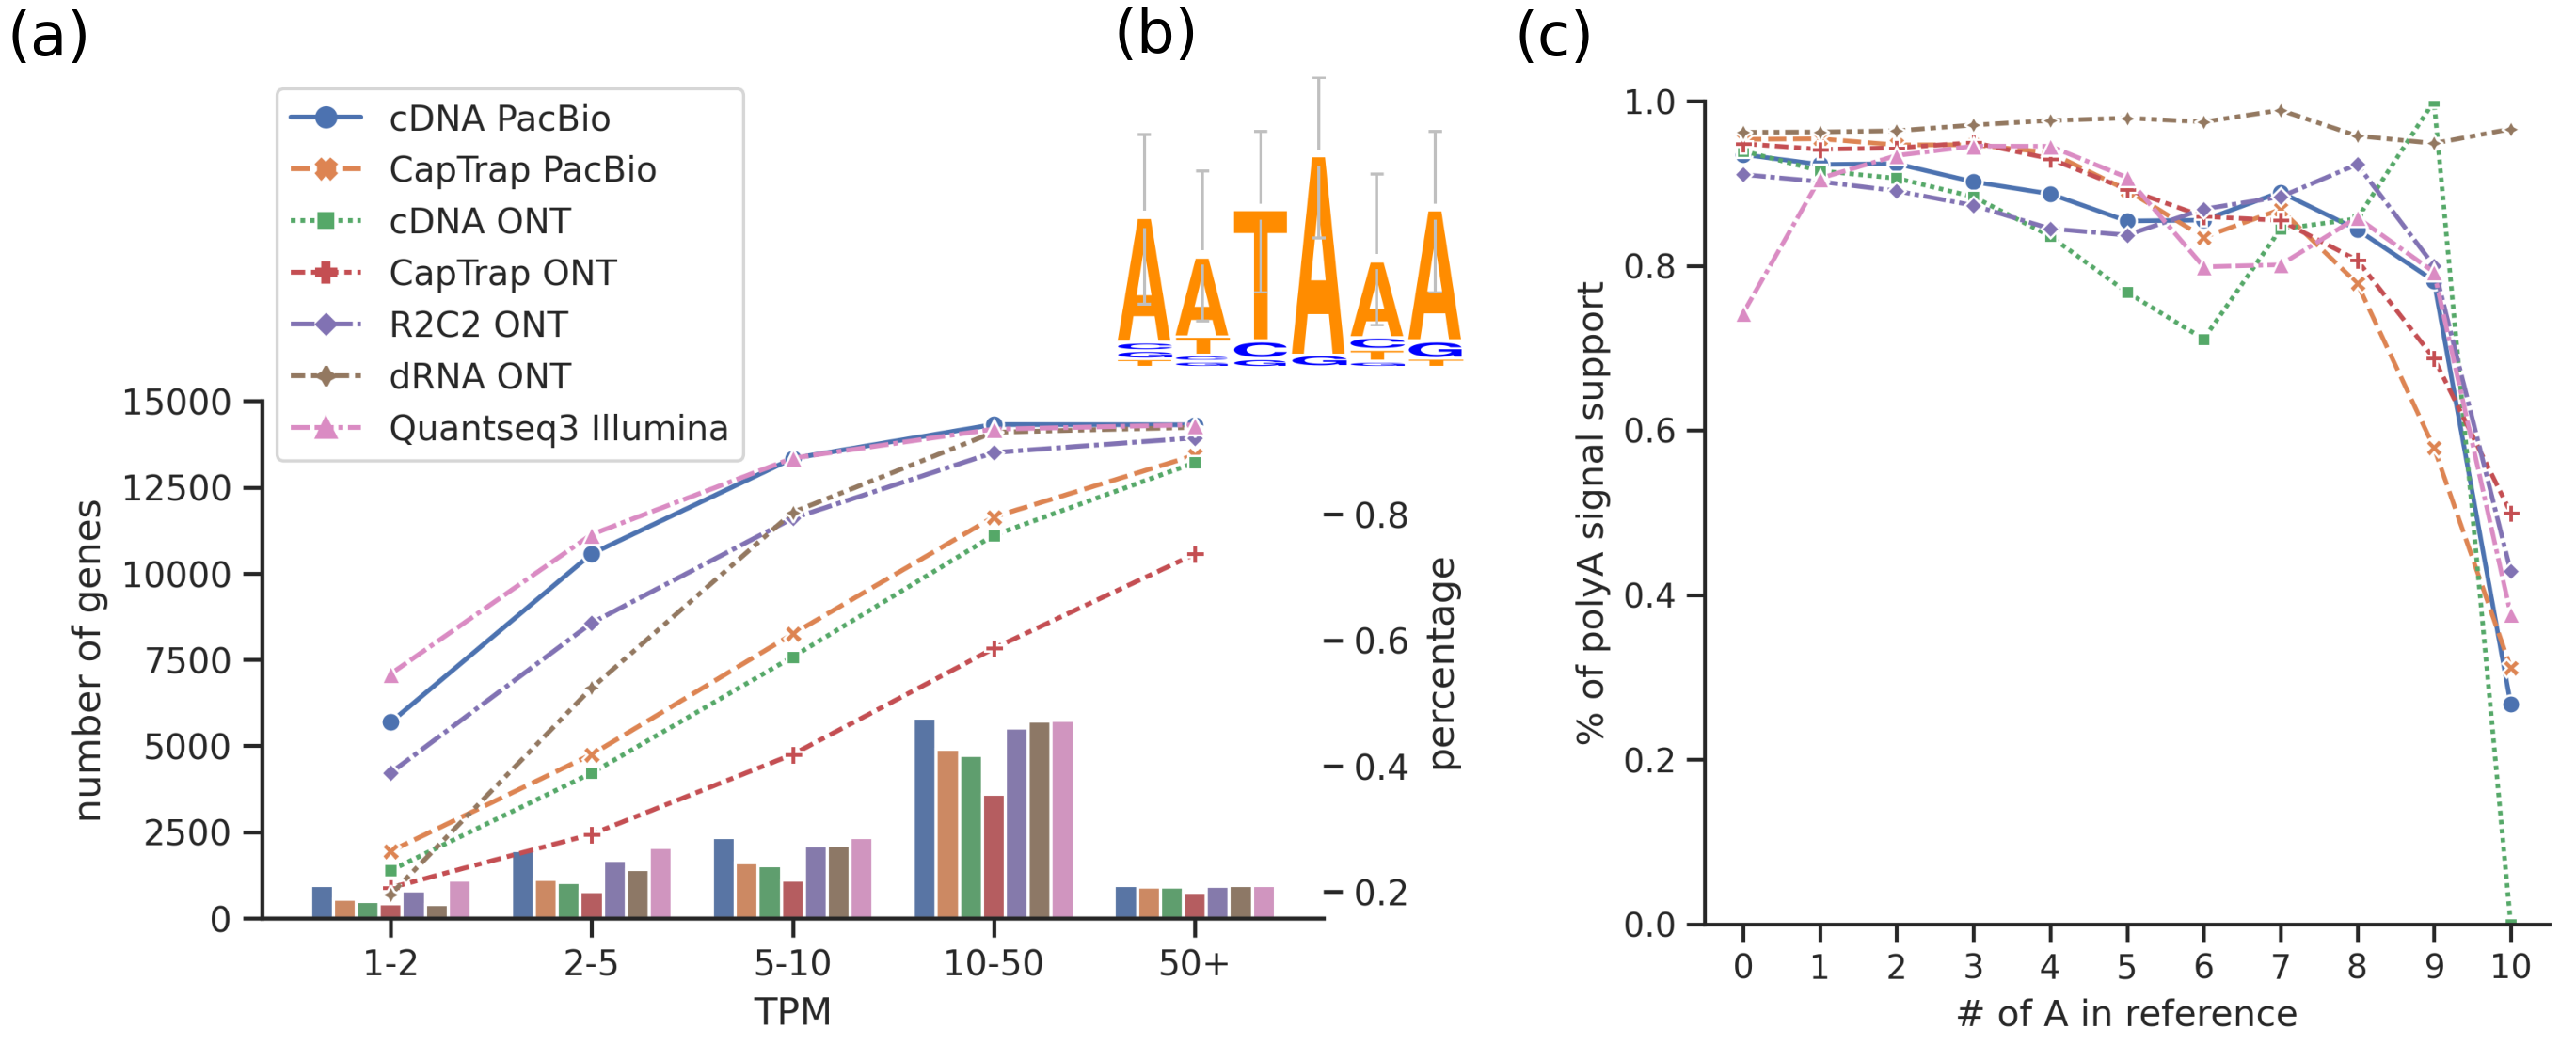

In [6]:
ax1 = pw.Brick("ax1", figsize=(15, 15))
ax1.imshow(img1)
ax1.axis('off')
ax1.set_title('(a)', fontsize=64)
ax1.title.set_x(0)
ax1.text(1400, -20, '(b)', fontsize=64)

ax3 = pw.Brick("ax3", figsize=(15, 15))
ax3.imshow(plt.imread(snakemake.input['fracA']))
ax3.axis('off')
ax3.set_title('(c)', fontsize=64)
ax3.title.set_x(0)

ax = ax1 | ax3
ax.savefig(snakemake.output['fig'].replace('.png', '_low.png'), dpi=25)
ax.savefig(snakemake.output['fig'])